In [1]:
!pip install google-cloud-bigquery==1.25.0 --use-feature=2020-resolver

     |████████████████████████████████| 169 kB 6.7 MB/s            
     |████████████████████████████████| 152 kB 39.6 MB/s            
     |████████████████████████████████| 93 kB 2.3 MB/s             
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.3.3
    Uninstalling google-auth-2.3.3:
      Successfully uninstalled google-auth-2.3.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.3.2
    Uninstalling google-api-core-2.3.2:
      Successfully uninstalled google-api-core-2.3.2
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 2.1.0
    Uninstalling google-resumable-media-2.1.0:
      Successfully uninstalled google-resumable-media-2.1.0
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.2.1
    Uninstalling google-cloud-core-2.2.1:
      Successfully uninstalled google-cloud-core-2.2.1
  Attempting uninstall:

In [2]:
%%bigquery df
SELECT
  departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrival_delay, 10) AS arrival_delay_deciles
FROM
  `bigquery-samples.airline_ontime_data.flights`
GROUP BY
  departure_delay
HAVING
  num_flights > 100
ORDER BY
  departure_delay ASC

Downloading: 100%|██████████| 508/508 [00:01<00:00, 371.60rows/s]


In [4]:
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-37.0,107,"[-66.0, -44.0, -41.0, -35.0, -30.0, -23.0, -17..."
1,-36.0,139,"[-74.0, -43.0, -39.0, -37.0, -32.0, -25.0, -18..."
2,-35.0,191,"[-68.0, -45.0, -40.0, -36.0, -28.0, -19.0, -14..."
3,-34.0,195,"[-58.0, -44.0, -40.0, -35.0, -30.0, -25.0, -19..."
4,-33.0,227,"[-59.0, -43.0, -39.0, -36.0, -32.0, -28.0, -20..."


In [5]:
import pandas as pd
percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles.rename(columns = lambda x : '{0}%'.format(x*10), inplace=True)
percentiles.head()

,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-66.0,-44.0,-41.0,-35.0,-30.0,-23.0,-17.0,-12.0,-3.0,6.0,33.0
1,-74.0,-43.0,-39.0,-37.0,-32.0,-25.0,-18.0,-14.0,-7.0,2.0,49.0
2,-68.0,-45.0,-40.0,-36.0,-28.0,-19.0,-14.0,-8.0,-4.0,3.0,85.0
3,-58.0,-44.0,-40.0,-35.0,-30.0,-25.0,-19.0,-14.0,-8.0,2.0,39.0
4,-59.0,-43.0,-39.0,-36.0,-32.0,-28.0,-20.0,-14.0,-7.0,5.0,25.0


In [6]:
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

,departure_delay,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-37.0,-66.0,-44.0,-41.0,-35.0,-30.0,-23.0,-17.0,-12.0,-3.0,6.0,33.0
1,-36.0,-74.0,-43.0,-39.0,-37.0,-32.0,-25.0,-18.0,-14.0,-7.0,2.0,49.0
2,-35.0,-68.0,-45.0,-40.0,-36.0,-28.0,-19.0,-14.0,-8.0,-4.0,3.0,85.0
3,-34.0,-58.0,-44.0,-40.0,-35.0,-30.0,-25.0,-19.0,-14.0,-8.0,2.0,39.0
4,-33.0,-59.0,-43.0,-39.0,-36.0,-32.0,-28.0,-20.0,-14.0,-7.0,5.0,25.0


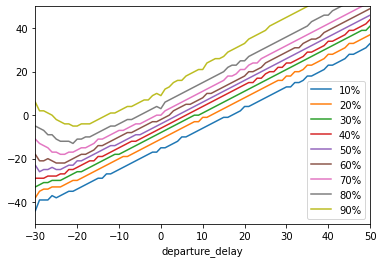

In [7]:
df.drop(labels=['0%', '100%'], axis=1, inplace=True)
df.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));